In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [84]:
df = pd.read_csv('E:\\Datasets\\data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [85]:
# i this step i take the pecenteange value of missing columns

df.isnull().sum() / len(df) *100

# another method to find missing values percentage

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [86]:
# i this step i take the all missing columns whose percentage value is less than 5%
# i use the list comprehension in this step

cca_columns = [i for i in df.columns if df[i].isnull().mean() >0 and df[i].isnull().mean()<.05]

df[cca_columns].sample(5)
        


,city_development_index,enrolled_university,education_level,experience,training_hours
2548,0.516,no_enrollment,Graduate,13.0,36.0
12509,0.920,no_enrollment,Graduate,4.0,138.0
9486,0.624,NaN,Graduate,0.0,32.0
1285,0.767,Full time course,Graduate,3.0,71.0
13607,0.920,no_enrollment,Masters,3.0,29.0


In [87]:
# in this step less than 5% columns i convert it into a new data frame

df_cca = df[cca_columns]

In [88]:
df_cca.shape

(19158, 5)

In [89]:
df_cca = df_cca.dropna()
df_cca.shape

(17182, 5)

In [90]:
# in this step i check the percentage of data after removing missing values

len(df_cca) / len(df)


0.8968577095730244

In [91]:
df.shape,df_cca.shape

((19158, 13), (17182, 5))

In [92]:
df_cca.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


<AxesSubplot:>

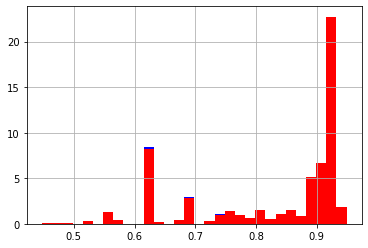

In [93]:
# plot the histogram to cheek distribuition
# histogram of city development column of original data frame

df['city_development_index'].hist(bins = 30,color = 'blue',density = True)


# histogram of city development column of after drop values data frame

df_cca['city_development_index'].hist(bins = 30,color = 'red',density = True)

# colclusion
# no change in distribuition so we can use this technique to handle the missing data

<AxesSubplot:ylabel='Density'>

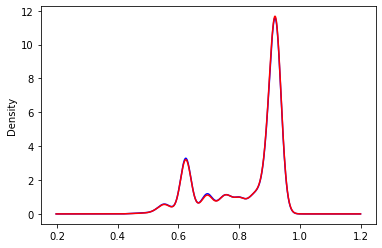

In [94]:
# plot the density to cheek distribuition
# histogram of city development column of original data frame

df['city_development_index'].plot.density(color = 'blue')


# histogram of city development column of after drop values data frame

df_cca['city_development_index'].plot.density(color = 'red')

<AxesSubplot:>

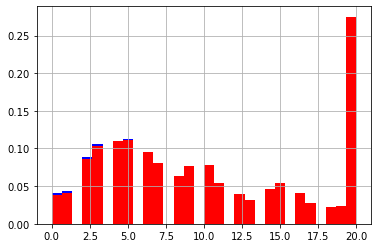

In [95]:
df['experience'].hist(bins = 30,color = 'blue',density = True)


# histogram of city development column of after drop values data frame

df_cca['experience'].hist(bins = 30,color = 'red',density = True)

<AxesSubplot:ylabel='Density'>

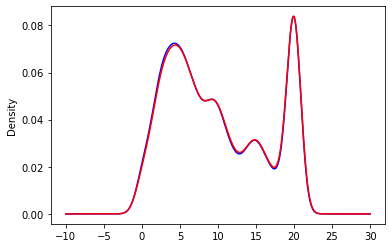

In [96]:
# plot the density to cheek distribuition
#distribuition of experience column of original data frame

df['experience'].plot.density(color = 'blue')


# histogram of experience column of after drop values data frame

df_cca['experience'].plot.density(color = 'red')

<AxesSubplot:>

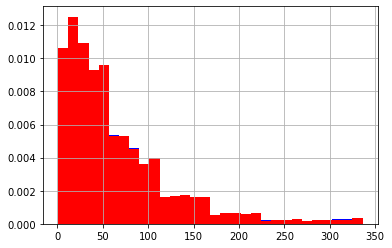

In [97]:
# histogram of training_hours column of original data frame

df['training_hours'].hist(bins = 30,color = 'blue',density = True)


# histogram of city development column of after drop values data frame

df_cca['training_hours'].hist(bins = 30,color = 'red',density = True)

<AxesSubplot:ylabel='Density'>

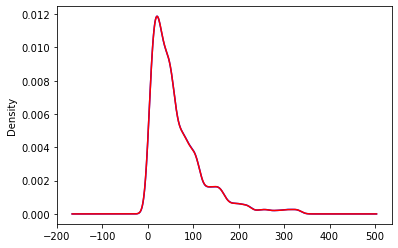

In [98]:
# plot the density to cheek distribuition
# distribuition of experience column of original data frame

df['training_hours'].plot.density(color = 'blue')


# distribuition of experience column of after drop values data frame

df_cca['training_hours'].plot.density(color = 'red')

In [104]:
cat_cca = pd.concat([
    
#     original datframe values
    df['enrolled_university'].value_counts() / len(df),
    df_cca['enrolled_university'].value_counts() / len(df_cca)
    
],axis=1)

cat_cca.columns = ['original','cca']

cat_cca


,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [103]:
cat_cca = pd.concat([
    
#     original datframe values
    df['education_level'].value_counts() / len(df),
    
#      after droping missing datframe values
    df_cca['education_level'].value_counts() / len(df_cca)
    
],axis=1)

cat_cca.columns = ['original','cca']

cat_cca


,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
